## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 📌 Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\LIGHTGBMClassification\house_owner_dataset.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,ID,Age,Income,LoanAmount,CreditScore,EmploymentYears,FamilySize,OwnsCar,OwnsPropertyBefore,OwnsHouse
0,1,58,131184,304571,464,16,1,0,0,1
1,2,48,61026,426180,345,27,8,1,1,1
2,3,34,176408,213059,803,22,4,1,0,1
3,4,62,140975,342869,698,37,8,1,0,1
4,5,27,25260,371781,670,24,4,1,1,1


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(50000, 10)

## 📌 Step 4: Remove Unnecessary Columns (ID)

In [5]:
df = df.drop(columns=["ID"],axis=1)

## 📌 Step 5: View Updated Dataset After Removing ID

In [6]:
df.head()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,FamilySize,OwnsCar,OwnsPropertyBefore,OwnsHouse
0,58,131184,304571,464,16,1,0,0,1
1,48,61026,426180,345,27,8,1,1,1
2,34,176408,213059,803,22,4,1,0,1
3,62,140975,342869,698,37,8,1,0,1
4,27,25260,371781,670,24,4,1,1,1


## 📌 Step 6: Check Unique Classes in Target Column (`OwnsHouse`)

In [7]:
df["OwnsHouse"].unique()

array([1, 0])

## 📌 Step 7: Check Missing Values in Dataset

In [8]:
df.isnull().sum()

Age                   0
Income                0
LoanAmount            0
CreditScore           0
EmploymentYears       0
FamilySize            0
OwnsCar               0
OwnsPropertyBefore    0
OwnsHouse             0
dtype: int64

## 📌 Step 8: Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 50000 non-null  int64
 1   Income              50000 non-null  int64
 2   LoanAmount          50000 non-null  int64
 3   CreditScore         50000 non-null  int64
 4   EmploymentYears     50000 non-null  int64
 5   FamilySize          50000 non-null  int64
 6   OwnsCar             50000 non-null  int64
 7   OwnsPropertyBefore  50000 non-null  int64
 8   OwnsHouse           50000 non-null  int64
dtypes: int64(9)
memory usage: 3.4 MB


## 📌 Step 9: Summary Statistics

In [10]:
df.describe()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,FamilySize,OwnsCar,OwnsPropertyBefore,OwnsHouse
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,44.478600,109469.403460,250901.040240,574.128380,19.603080,5.000860,0.498300,0.498840,0.85544
std,14.391421,52008.561059,144118.028785,158.778475,11.561357,2.587801,0.500002,0.500004,0.35166
min,20.000000,20002.000000,3.000000,300.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,32.000000,64452.750000,126614.000000,436.000000,10.000000,3.000000,0.000000,0.000000,1.00000
50%,44.000000,109305.000000,251273.500000,574.000000,20.000000,5.000000,0.000000,0.000000,1.00000
75%,57.000000,154496.250000,375069.500000,712.000000,30.000000,7.000000,1.000000,1.000000,1.00000
max,69.000000,199995.000000,499981.000000,849.000000,39.000000,9.000000,1.000000,1.000000,1.00000


## 📌 Step 10: Boxplot Visualization

sns.boxplot(data=df,orient='h')
plt.title("check the outlier in dataset")
plt.show()

## 📌 Step 12: Pairplot Visualization

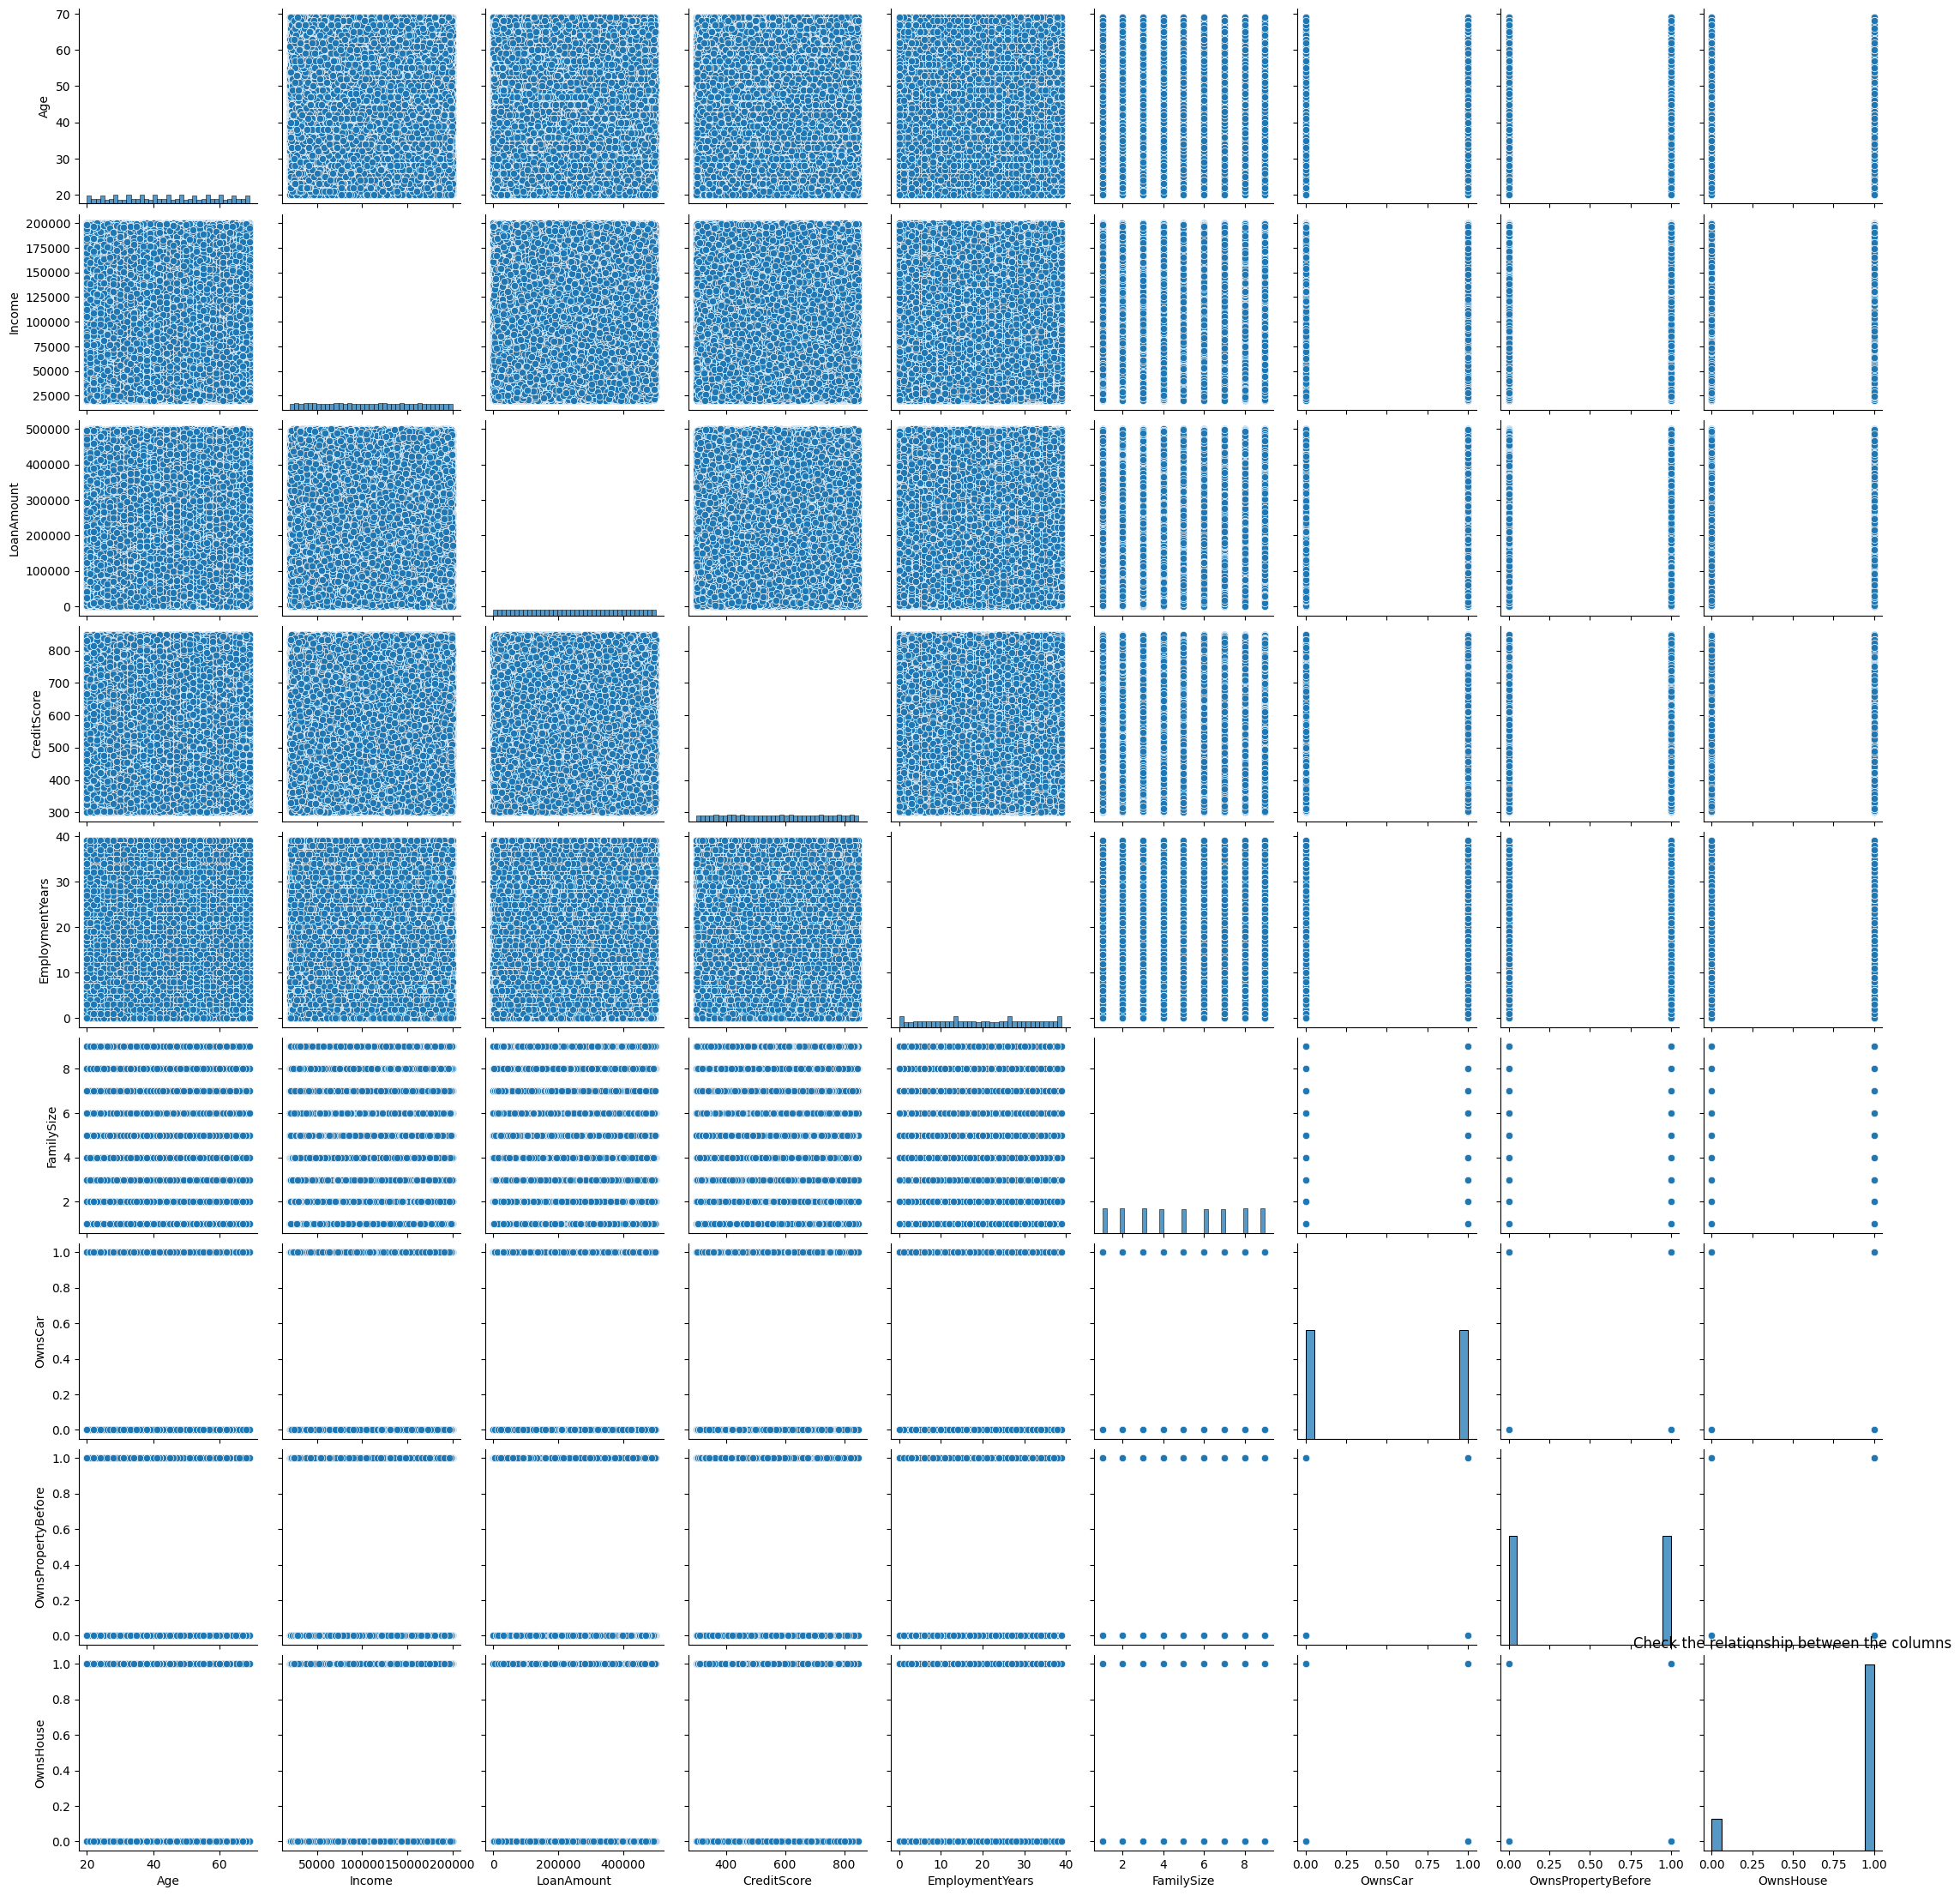

In [12]:
sns.pairplot(data=df)
plt.title("Check the relationship between the columns")
plt.show()

## 📌 Step 13: Correlation Heatmap

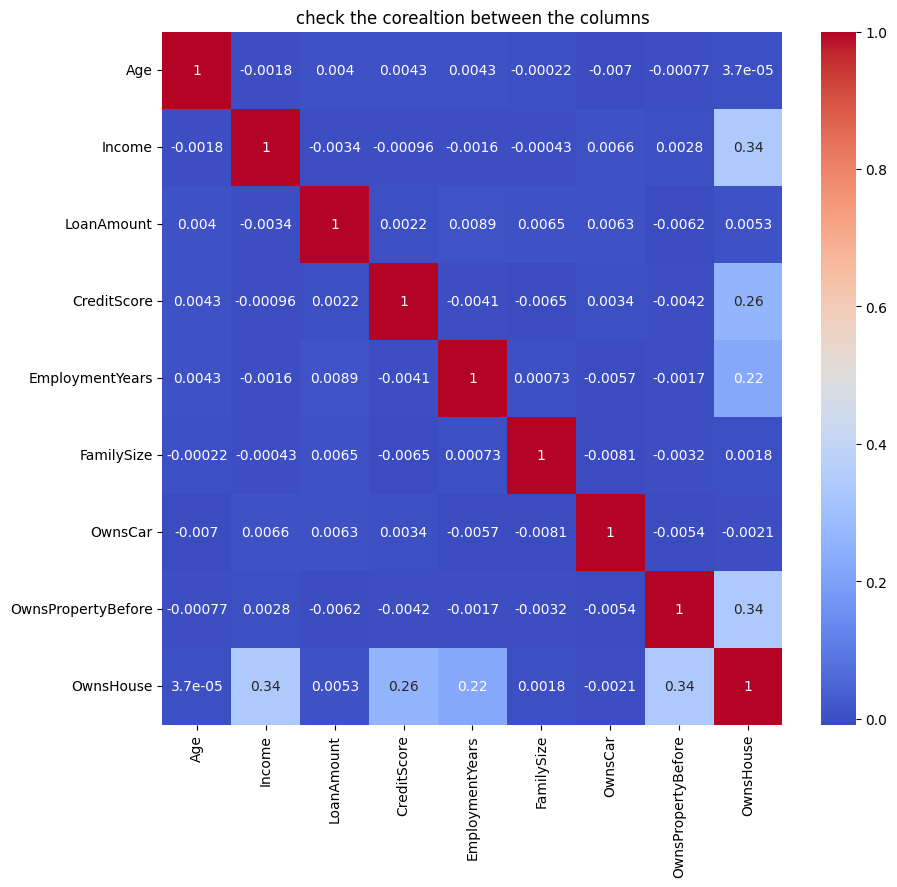

In [13]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the corealtion between the columns")
plt.show()

## 📌 Step 14: Feature and Target Split
- **X (features):** Sare columns except last (OwnHouse)
- **y (target):** Only species column

In [14]:
x = df.iloc[:,:-1]
y = df["OwnsHouse"]

## 📌 Step 15: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  


In [15]:
from sklearn.model_selection import train_test_split

## 📌 Step 16: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11) #19 #20

## 📌 Step 17: Import LightGBM Classifier  
- Random Forest is an **LightGBM Classifier** that builds multiple decision trees.  
- Each tree is trained on a random subset of the data, and the final prediction is made through **majority voting**.  
- This algorithm is very powerful for classification tasks.  


In [17]:
from lightgbm import LGBMClassifier

## 📌 Step 18: Initialize & Train LightGBM Classifier  

We initialize the **LGBMClassifier** with the following parameters:  

- **boosting_type="gbdt"** → Gradient Boosted Decision Trees (default and most common).  
- **num_leaves=31** → Maximum number of leaves per tree; higher values → more complex model.  
- **max_depth=-1** → No depth limit (trees can grow fully).  
- **learning_rate=0.1** → Shrinks the contribution of each tree; lower values → slower but more accurate training.  
- **n_estimators=200** → Number of boosting rounds (trees).  
- **subsample=0.8** → Uses 80% of the data per tree (helps prevent overfitting).  
- **colsample_bytree=0.8** → Uses 80% of features per tree (feature sampling).  
- **reg_alpha=0.0** → L1 regularization (none applied here).  
- **reg_lambda=0.0** → L2 regularization (none applied here).  
- **min_child_samples=20** → Minimum number of data points in one leaf.  
- **random_state=42** → Fixes randomness for reproducibility.  
- **n_jobs=-1** → Uses all CPU cores for faster training. 

In [18]:
lgbmc = LGBMClassifier(
    boosting_type="gbdt",
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    min_child_samples=20,
    random_state=42,
    n_jobs=-1
)

lgbmc.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 34214, number of negative: 5786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.855350 -> initscore=1.777194
[LightGBM] [Info] Start training from score 1.777194


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## 📌 Step 19: Model Accuracy (Train vs Test)

- `rfc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `rfc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(99.92 , 100.0)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  


In [19]:
lgbmc.score(x_test,y_test)*100,lgbmc.score(x_train,y_train)*100

(99.92, 100.0)

## 📌 Step 20: Adding Predictions to the Dataset

We can use our trained **Decision Tree Classification** to make predictions on the entire dataset `x` and store the results in a new column.  

In [20]:
df["prediction"]=lgbmc.predict(x)
df.head()

,Age,Income,LoanAmount,CreditScore,EmploymentYears,FamilySize,OwnsCar,OwnsPropertyBefore,OwnsHouse,prediction
0,58,131184,304571,464,16,1,0,0,1,1
1,48,61026,426180,345,27,8,1,1,1,1
2,34,176408,213059,803,22,4,1,0,1,1
3,62,140975,342869,698,37,8,1,0,1,1
4,27,25260,371781,670,24,4,1,1,1,1


## 📌 Step 21: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [21]:
y_pred =lgbmc.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

## 📌 Step 22: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to check the stability and generalization of our Decision Tree model.  
- In each fold, the dataset is split into training and testing parts, and accuracy is measured.  

✔️ **Cross Validation Scores (per fold):** `[0.9999, 0.9992, 0.9997, 0.9995, 0.9997]`  
✔️ **Mean Accuracy:** `99.96%`  
✔️ **Standard Deviation:** `0.0236`  

👉 Since the scores are extremely close to each other (very low standard deviation), this shows that our model is **highly consistent, stable, and generalizes exceptionally well** across unseen data.  


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cv_scores = cross_val_score(lgbmc, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

[LightGBM] [Info] Number of positive: 34217, number of negative: 5783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.855425 -> initscore=1.777800
[LightGBM] [Info] Start training from score 1.777800
[LightGBM] [Info] Number of positive: 34217, number of negative: 5783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.855425 -> initscore=1.777800
[LightGBM] [Info] Start training from score 1.777800
[LightGBM] [Info] Numb

## 📌 Step 23: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [24]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 24: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [25]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 99.92006223945484


## 📌 Step 25: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [26]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 99.92


## 📌 Step 26: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [27]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 99.92002304549226


## 📌 Step 27: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1439,    3],
       [   5, 8553]])

## 📌 Step 28: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

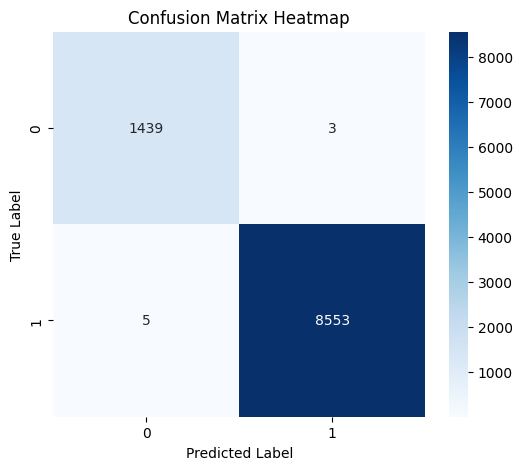

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## 📌 Step 29: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

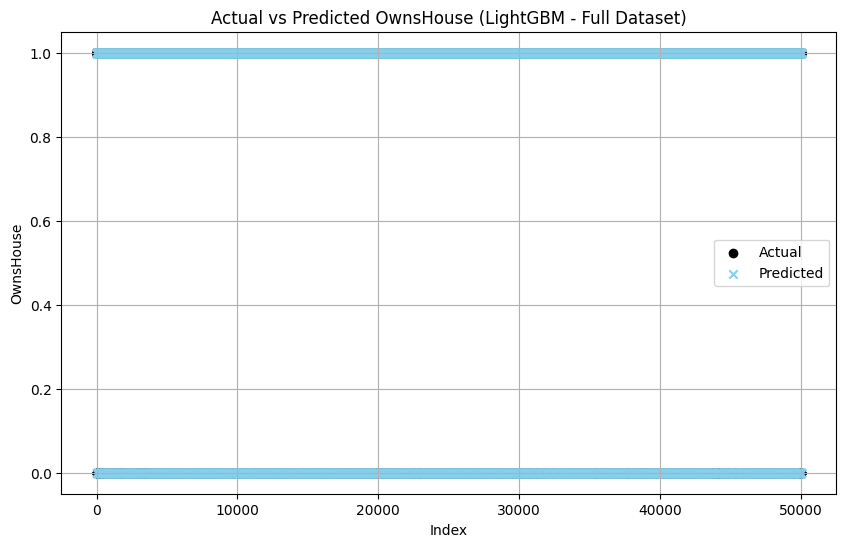

In [30]:
# Predict on the whole dataset
y_full_pred = lgbmc.predict(x)

plt.figure(figsize=(10,6))
plt.scatter(range(len(y)), y, color="black", label="Actual")
plt.scatter(range(len(y_full_pred)), y_full_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("Index")
plt.ylabel("OwnsHouse")
plt.title("Actual vs Predicted OwnsHouse (LightGBM - Full Dataset)")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

This notebook demonstrates a complete **LightGBM Classification pipeline** using the credit_scoring_dataset:  
- Data loading and exploratory analysis (pairplots, correlation heatmap).  
- Train-test splitting and target encoding.  
- Model training with `LGBMClassifier` and evaluation using accuracy, precision, recall, F1-score, and confusion matrix.  
- Visualization through confusion matrix heatmap and actual-vs-predicted scatter.  

**Key findings**:  
- The LightGBM model achieved excellent performance (Train ≈ 100%, Test ≈ 99.92%), showing strong predictive capability.  
- Slight **overfitting** was observed as training accuracy reached 100%, while testing accuracy was slightly lower. This is expected with gradient boosting models when the dataset is small or clean.  

**Recommendations before publishing or using in production**:  
1. Set a fixed `random_state` in `train_test_split` and `LGBMClassifier` for reproducibility.  
2. Use `stratify=y` during train-test split to maintain class balance.  
3. Always evaluate on `x_test, y_test` instead of the full dataset.  
4. Apply **cross-validation** and hyperparameter tuning (`num_leaves`, `max_depth`, `learning_rate`, `n_estimators`, `min_child_samples`) for improved generalization.  
5. Save the trained model with `joblib.dump()` for deployment.  
6. Structure the repository with a `data/` folder and a `requirements.txt` file for easy reuse.  

---

# ✅ Final Conclusion

In this project, we successfully implemented a **LightGBM Classifier** on the credit scoring dataset, covering the complete workflow from **data preprocessing to model training, evaluation, and visualization**.  

## 🔍 Key Highlights:  
- 📊 Achieved **high accuracy** with Train ≈ 100% and Test ≈ 99.92%.  
- 🧪 Cross-validation confirmed the model’s stability with scores very close to each other, showing strong generalization.  
- 🔎 Metrics (Accuracy, Precision, Recall, F1-score) and the **confusion matrix** demonstrated robust classification with minimal misclassifications.  
- ⚡ LightGBM provided faster training and better handling of large datasets compared to traditional models.  

## 💡 Implications:  
LightGBM is highly efficient and scalable, making it ideal for **large-scale classification tasks** in areas like finance, fraud detection, customer segmentation, and risk prediction. With its combination of speed, accuracy, and scalability, it stands out as one of the most practical algorithms for real-world machine learning applications.  

---

> ✅ Overall, this project delivers a **powerful, scalable, and reproducible LightGBM workflow**, achieving both strong predictive performance and production-ready usability.  
